In [31]:
import numpy as np
import random

# Colors and object types
COLORS = {
    "red": np.array([255, 0, 0]),
    "green": np.array([0, 255, 0]),
    "blue": np.array([0, 0, 255]),
    "purple": np.array([112, 39, 195]),
    "yellow": np.array([255, 255, 0]),
    "grey": np.array([100, 100, 100]),
}
OBJECT_TYPES = ["key", "ball", "box"]

# Function to create the maze
def create_maze(colors, object_types):
    # Select 4 random colors for initial keys
    initial_key_colors = random.sample(colors, 4)
    initial_keys = [("key", color) for color in initial_key_colors]

    # Create all possible pairs
    all_pairs = [(obj_type, color) for obj_type in object_types for color in colors]

    # Remove initial key pairs from all pairs
    remaining_pairs = [pair for pair in all_pairs if pair not in initial_keys]

    # Select 8 unique pairs from the remaining pairs
    selected_pairs = random.sample(remaining_pairs, 8)

    # Split into 4 sets of 2
    sets_of_pairs = [selected_pairs[i:i+2] for i in range(0, len(selected_pairs), 2)]

    return initial_keys, sets_of_pairs

# Create the maze
initial_keys, sets_of_pairs = create_maze(list(COLORS.keys()), OBJECT_TYPES)

from pprint import pprint
print("Initial Keys:")
pprint(initial_keys)
print("Sets of Pairs:")
pprint(sets_of_pairs)


Initial Keys:
[('key', 'purple'), ('key', 'blue'), ('key', 'green'), ('key', 'yellow')]
Sets of Pairs:
[[('key', 'red'), ('ball', 'red')],
 [('box', 'red'), ('ball', 'blue')],
 [('box', 'yellow'), ('box', 'purple')],
 [('ball', 'green'), ('box', 'green')]]


In [2]:
# this one has the test pairs overlap in shape/color with the keys/training pairs
def create_maze_overlap(colors, object_types):
    # Select 4 random colors for initial keys
    initial_key_colors = random.sample(colors, 4)
    initial_keys = [("key", color) for color in initial_key_colors]

    # Create all possible pairs
    all_pairs = [(obj_type, color) for obj_type in object_types for color in colors]

    # Remove initial key pairs from all pairs
    remaining_pairs = [pair for pair in all_pairs if pair not in initial_keys]

    # Select 4 unique pairs from the remaining pairs
    first_selected_pairs = random.sample(remaining_pairs, 4)

    # Observe types and colors from these pairs
    observed_types = set([pair[0] for pair in first_selected_pairs+initial_keys])
    observed_colors = set([pair[1] for pair in first_selected_pairs+initial_keys])

    # Create possible pairs from observed types and colors
    possible_new_pairs = [(obj_type, color) for obj_type in observed_types for color in observed_colors]

    # Remove already selected pairs
    new_pairs_candidates = [pair for pair in possible_new_pairs if pair not in first_selected_pairs and pair not in initial_keys]

    # Select 4 unique pairs from new pairs candidates
    second_selected_pairs = random.sample(new_pairs_candidates, 4)

    # Interleave first and second pairs to form 4 sets of 2
    sets_of_pairs = [(first_selected_pairs[i], second_selected_pairs[i]) for i in range(4)]

    return initial_keys, sets_of_pairs

# Create the maze
initial_keys, sets_of_pairs = create_maze_overlap(list(COLORS.keys()), OBJECT_TYPES)

from pprint import pprint
print("Initial Keys:")
pprint(initial_keys)
print("Sets of Pairs:")
pprint(sets_of_pairs)


Initial Keys:
[('key', 'grey'), ('key', 'green'), ('key', 'yellow'), ('key', 'purple')]
Sets of Pairs:
[(('ball', 'green'), ('box', 'red')),
 (('box', 'purple'), ('ball', 'grey')),
 (('box', 'yellow'), ('ball', 'purple')),
 (('key', 'red'), ('box', 'grey'))]


In [41]:
import json

def create_n_pairs_of_mazes(n, colors, object_types, create_fn=create_maze):
    pairs_of_mazes = []

    for _ in range(n):
        # Generate a pair of unique mazes
        init_keys, room_pairs = create_fn(colors, object_types)
        
        # Ensure uniqueness in the pair
        while init_keys in pairs_of_mazes or room_pairs in pairs_of_mazes or init_keys == room_pairs:
            init_keys, room_pairs = create_fn(colors, object_types)
        
        pairs_of_mazes.append({'keys': init_keys, 'pairs': room_pairs})

    return pairs_of_mazes

# ###########
# # shared atributes
# ###########
json_file = 'maze_pairs_shared.json'
create_fn = create_maze_overlap

###########
# regular
###########
# json_file = 'maze_pairs.json'
# create_fn = create_maze

###########


# Example usage
n = 5  # Number of pairs of mazes to generate
maze_pairs = create_n_pairs_of_mazes(n, list(COLORS.keys()), OBJECT_TYPES, create_fn=create_fn)
pprint(maze_pairs)
# Save to a JSON file


with open(json_file, 'w') as file:
    json.dump(maze_pairs, file, indent=4)

print(f'Maze pairs saved to {json_file}')


[{'keys': [('key', 'green'), ('key', 'red'), ('key', 'blue'), ('key', 'grey')],
  'pairs': [(('key', 'purple'), ('box', 'red')),
            (('ball', 'green'), ('key', 'yellow')),
            (('box', 'purple'), ('ball', 'grey')),
            (('box', 'yellow'), ('box', 'blue'))]},
 {'keys': [('key', 'purple'),
           ('key', 'yellow'),
           ('key', 'blue'),
           ('key', 'green')],
  'pairs': [(('box', 'red'), ('ball', 'red')),
            (('ball', 'green'), ('ball', 'yellow')),
            (('key', 'grey'), ('box', 'blue')),
            (('ball', 'purple'), ('key', 'red'))]},
 {'keys': [('key', 'blue'),
           ('key', 'red'),
           ('key', 'purple'),
           ('key', 'yellow')],
  'pairs': [(('box', 'grey'), ('key', 'grey')),
            (('ball', 'grey'), ('box', 'red')),
            (('box', 'blue'), ('key', 'green')),
            (('box', 'green'), ('ball', 'red'))]},
 {'keys': [('key', 'yellow'),
           ('key', 'green'),
           ('key', 'grey'),

In [42]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0,'../..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
from projects.human_sf import key_room_v3 as key_room

# json_file = 'maze_pairs.json'
with open(json_file, 'r') as file:
    mazes = json.load(file)

maze = mazes[0]
pprint(maze)

{'keys': [['key', 'green'], ['key', 'red'], ['key', 'blue'], ['key', 'grey']],
 'pairs': [[['key', 'purple'], ['box', 'red']],
           [['ball', 'green'], ['key', 'yellow']],
           [['box', 'purple'], ['ball', 'grey']],
           [['box', 'yellow'], ['box', 'blue']]]}


In [60]:
maze = mazes[0]
pprint(maze)
import copy
maze_config = copy.deepcopy(maze)
maze_config['pairs'][0][1], maze_config['pairs'][1][1] = maze_config['pairs'][1][1], maze_config['pairs'][0][1]
pprint(maze_config)
# new_maze=dict(
#     keys=maze['keys'],
#     pairs=[
#         [maze['pairs'][0],
#     ]
# )
# new_maze['keys'] = 

# pairs = maze['pairs']
# pairs[0]

{'keys': [['key', 'green'], ['key', 'red']],
 'pairs': [[['key', 'purple'], ['box', 'red']],
           [['ball', 'green'], ['key', 'yellow']]]}
{'keys': [['key', 'green'], ['key', 'red']],
 'pairs': [[['key', 'purple'], ['key', 'yellow']],
           [['ball', 'green'], ['box', 'red']]]}


[['key', 'purple'], ['ball', 'green'], ['box', 'red'], ['key', 'yellow']]


/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.all_final_objects to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.all_final_objects` for environment variables or `env.get_wrapper_attr('all_final_objects')` that will search the reminding wrappers.
  logger.warn(
/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(


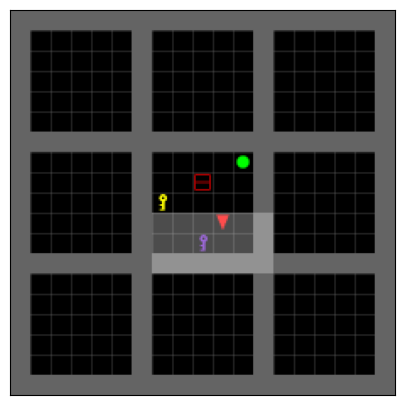

In [45]:
import matplotlib.pyplot as plt
import minigrid

def plot_image(image, figsize=(5,5)):
    fig, ax = plt.subplots(1,1, figsize=figsize)
    # ax.clear()  # Clear the previous plot
    # Remove ticks on both the x and y axes
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Optionally, you can also remove the tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.imshow(image)

env = key_room.KeyRoom(
    maze_config=mazes[0],
    training=False,
    swap_episodes=3,
    num_dists=2,
    num_task_rooms=2,
    color_rooms=False,
    basic_only=1,
    flat_task=True)

env = minigrid.wrappers.RGBImgObsWrapper(env, tile_size=12)

print(env.all_final_objects)
for _ in range(1):
    obs, info = env.reset()
    plot_image(obs['image'])  # Assuming image has shape (C, H, W)

In [65]:
# env.train_objects + env.test_objects
# print(env.task.make_task_array())
env = key_room.KeyRoom(
    maze_config=mazes[0],
    training=False,
    swap_episodes=3,
    num_dists=2,
    num_task_rooms=2,
    color_rooms=False,
    basic_only=1,
    flat_task=True)
env.reset()
env.task.print_task_array()

env = key_room.KeyRoom(
    maze_config=mazes[0],
    training=False,
    swap_episodes=3,
    num_dists=2,
    num_task_rooms=2,
    color_rooms=False,
    basic_only=1,
    flat_task=True)
print('-------')
env.reset()
env.task.print_task_array()

purple, room = 0.0
purple, box = 0.0
purple, key = 0.0
purple, ball = 0.0
green, room = 0.0
green, box = 0.0
green, key = 0.0
green, ball = 0.0
red, room = 0.0
red, box = 1.0
red, key = 0.0
red, ball = 0.0
yellow, room = 0.0
yellow, box = 0.0
yellow, key = 0.0
yellow, ball = 0.0
start, room = 0.0
start, box = 0.0
start, key = 0.0
start, ball = 0.0
-------
purple, room = 0.0
purple, box = 0.0
purple, key = 0.0
purple, ball = 0.0
green, room = 0.0
green, box = 0.0
green, key = 0.0
green, ball = 0.0
red, room = 0.0
red, box = 1.0
red, key = 0.0
red, ball = 0.0
yellow, room = 0.0
yellow, box = 0.0
yellow, key = 0.0
yellow, ball = 0.0
start, room = 0.0
start, box = 0.0
start, key = 0.0
start, ball = 0.0


/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(


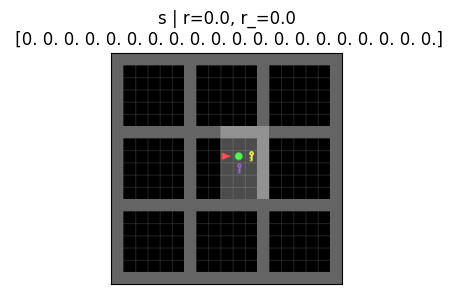

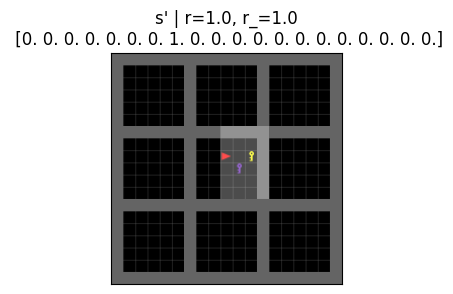

224: reward: 1.0 for green ball
state-features: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
task: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
terminated: True
truncated: False
BREAKING


/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.task to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.task` for environment variables or `env.get_wrapper_attr('task')` that will search the reminding wrappers.
  logger.warn(
/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(


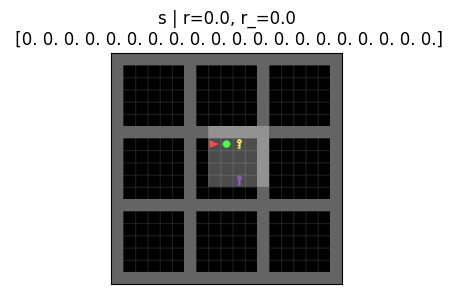

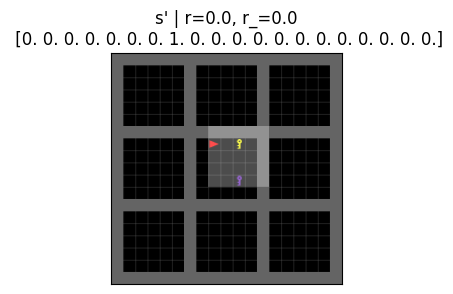

30: reward: 0.0 for purple key
state-features: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
task: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
terminated: True
truncated: False
BREAKING


/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.task to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.task` for environment variables or `env.get_wrapper_attr('task')` that will search the reminding wrappers.
  logger.warn(
/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(


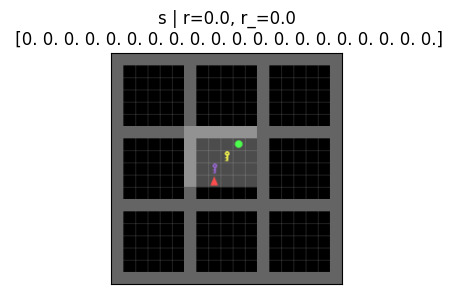

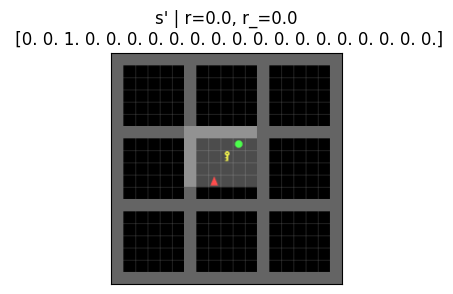

68: reward: 0.0 for yellow key
state-features: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
task: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
terminated: True
truncated: False
BREAKING


/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.task to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.task` for environment variables or `env.get_wrapper_attr('task')` that will search the reminding wrappers.
  logger.warn(
/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(


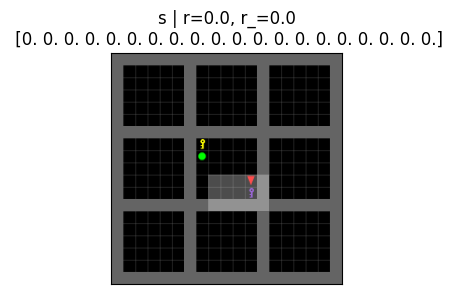

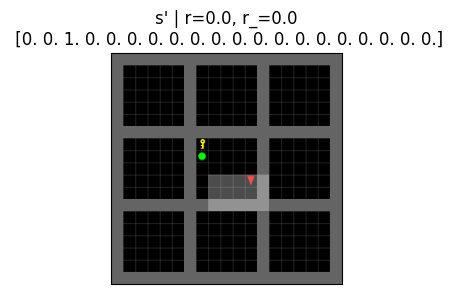

83: reward: 0.0 for red box
state-features: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
task: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
terminated: True
truncated: False
BREAKING


/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.task to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.task` for environment variables or `env.get_wrapper_attr('task')` that will search the reminding wrappers.
  logger.warn(


In [59]:
env = key_room.KeyRoom(
    maze_config=mazes[0],
    training=True,
    swap_episodes=1_000_000,
    num_dists=0,
    max_steps_per_room=1_000_000,
    num_task_rooms=2,
    basic_only=1,
    color_rooms=False,
    flat_task=True)

env = minigrid.wrappers.DictObservationSpaceWrapper(env)
use_options=False
if use_options:
    env = custom_wrappers.GotoOptionsWrapper(env)
# env = minigrid.wrappers.RGBImgPartialObsWrapper(env, tile_size=12)
env = minigrid.wrappers.RGBImgObsWrapper(env, tile_size=12)

def prep_ax(ax):
    ax.clear()  # Clear the previous plot
    # Remove ticks on both the x and y axes
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Optionally, you can also remove the tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    

# Create a figure and axis for plotting
# fig, ax = plt.subplots(1,1, figsize=(3,3))
# prep_ax(ax)
# ax.imshow(obs['image'])  # Assuming image has shape (C, H, W)
# ax.set_title(f"Reset: {env.task.goal()}")

def display(obs, reward, prime=False):
    computed_r = (obs['state_features']*obs['task']).sum(-1)
    suff = lambda x: x+"'" if prime else x

    title = suff("s")
    title += f" | r={reward}, r_={computed_r}"
    title += f"\n {str(obs['state_features'])}"
    fig, ax = plt.subplots(1,1, figsize=(3,3))
    prep_ax(ax)
    ax.imshow(obs['image'])  # Assuming image has shape (C, H, W)
    ax.set_title(title)
    plt.show()
    plt.pause(0.1)  # Pause for a moment to display the image

for _ in range(4):
    obs, info = env.reset()
    for t in range(100000):
        if use_options:
            actions = list(range(info['nactions']))
        else:
            nactions = env.action_space
            actions = list(range(env.action_space.n))
        action = random.choice(actions)
        obs, reward, done, truncated, info = env.step(action)
    
        # if t % 500 == 0:
        #     print("PERIODIC DISPLAY", t)
        #     display(obs, reward, prime=False)
        if reward > 0.0 or done:
            # Extract the image from the observation
            print("="*50)
            display(prior_obs, prior_reward, prime=False)
            display(obs, reward, prime=True)
            # fig, ax = plt.subplots(1,1, figsize=(3,3))
            # prep_ax(ax)
            # ax.imshow(prior_obs['image'])  # Assuming image has shape (C, H, W)
            # ax.set_title(f"s")
            
            # Display the image with the action as the title
        
    
            # display(obs, reward, prime=False)
    
            print(f"{t}: reward: {reward} for {env.task.task_name}")
            print(f"state-features: {obs['state_features']}")
            print(f"task: {obs['task']}")
            print(f"terminated: {done}")
            print(f"truncated: {truncated}")
            # break
            if done:
                print("BREAKING")
                break
    
        prior_obs = obs
        prior_reward = reward
            
    # Close the plot window at the end
    plt.close()

In [52]:
env.task.print_task_array()

purple, room = 0.0
purple, box = 0.0
purple, key = 1.0
purple, ball = 0.0
green, room = 0.0
green, box = 0.0
green, key = 0.0
green, ball = 0.0
red, room = 0.0
red, box = 0.0
red, key = 0.0
red, ball = 0.0
yellow, room = 0.0
yellow, box = 0.0
yellow, key = 0.0
yellow, ball = 0.0
start, room = 0.0
start, box = 0.0
start, key = 0.0
start, ball = 0.0


In [215]:
env.unwrapped.all_final_objects

[['ball', 'red'], ['key', 'purple'], ['box', 'yellow'], ['box', 'purple']]

In [216]:
env.unwrapped.all_possible_objects

[['ball', 'red'],
 ['key', 'purple'],
 ['box', 'yellow'],
 ['box', 'purple'],
 ['key', 'red'],
 ['key', 'blue']]